# Titanic Dataset Analysis

From Kaggle: The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Tasks:



1.   Every step must have an explanation
2.   Every plot/ chart must have an iterpretation
3.   Add your observations for each section
4.   Draw clear conclusions (at least 5 conclusions)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import pandas as pd
#show the missing data number
train.isnull().sum()#show the missing data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#show the percentage of missing data 
100*(train.isnull().sum()/len(train))
def missing_values_percent(train):#we can use this function in all dataframes.
    nan_percent=100*(train.isnull().sum()/len(train))
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return(nan_percent)

nan_percent=missing_values_percent(train)
nan_percent

Embarked     0.224467
Age         19.865320
Cabin       77.104377
dtype: float64

In [6]:
#show missing data as a heat map using sns
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:>

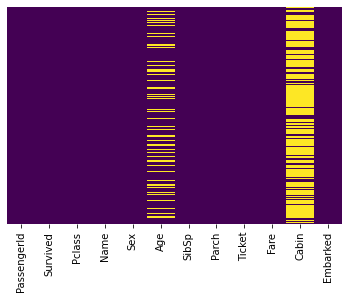

In [7]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,  cmap='viridis')

In [8]:
train.drop('Cabin', axis=1, inplace= True)#https://www.w3schools.com/Python/pandas/ref_df_dropna.asp
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

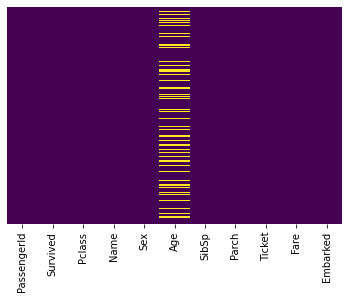

In [9]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,  cmap='viridis')

In [10]:
train["Survived"].value_counts(normalize=False)#How many passengers survived?

0    549
1    342
Name: Survived, dtype: int64

In [11]:
train["Survived"].value_counts(normalize=True)#How many passengers survived?

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

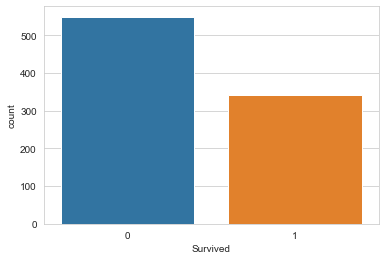

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

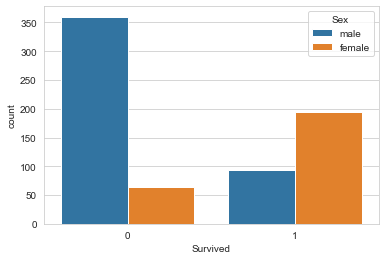

In [13]:
train.dropna(inplace=True)
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train)

In [14]:
train.groupby(["Pclass"])["Survived"].mean().to_frame()

,Survived
Pclass,
1,0.652174
2,0.479769
3,0.239437


<AxesSubplot:xlabel='Survived', ylabel='count'>

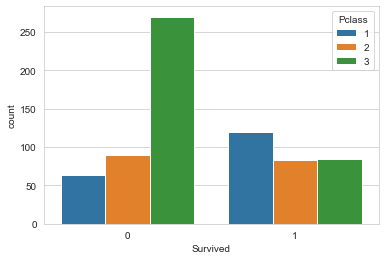

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

<AxesSubplot:xlabel='Age', ylabel='count'>

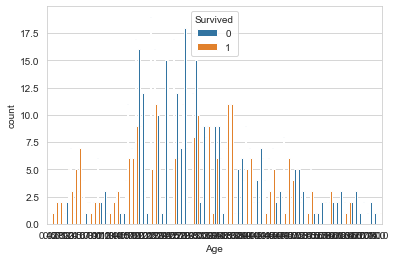

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Age', hue='Survived', data=train)

<AxesSubplot:xlabel='Age', ylabel='count'>

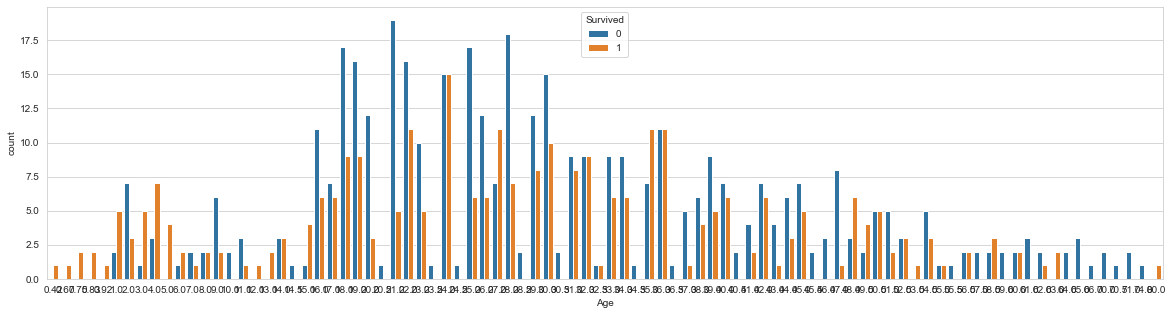

In [17]:
#resizing the plot
plt.figure(figsize=(20,5))
sns.set_style('whitegrid')
sns.countplot(x='Age', hue='Survived', data=train)

In [18]:
def bar_chart_stacked(dataset,feature,stacked=True):
  survived=train[train["Survived"]==1][feature].value_counts()
  dead=train[train["Survived"]==0][feature].value_counts()   
  df_survived_dead=pd.DataFrame([survived,dead])  
  df_survived_dead.index=["passengers survived","passengers died"]   
  df_survived_dead.plot(kind="bar",stacked=stacked,figsize=(8,5))

In [19]:
train.groupby(["Pclass"])["Survived"].mean().to_frame()

,Survived
Pclass,
1,0.652174
2,0.479769
3,0.239437


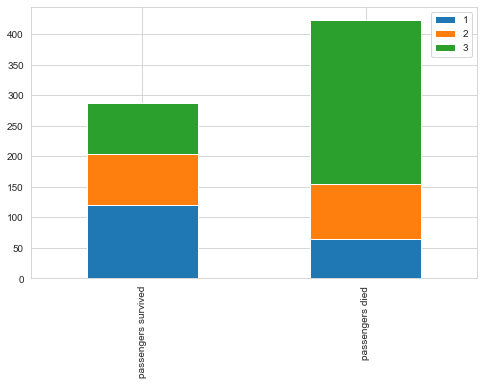

In [20]:
bar_chart_stacked(train,"Pclass")

We see that 62% of passengers in class 1 were survived but this amount is reduced to 47% for class 2 and only 24% of passengers in class 3 were survived.On the other words the percentage of survived passengers in class 1 is 2 times bigger than the percentage of died passengers in this class.But in class 2 the percentage of survived people and died people is almost equal and for class 3 the percentage of died people is three times bigger than survived one.

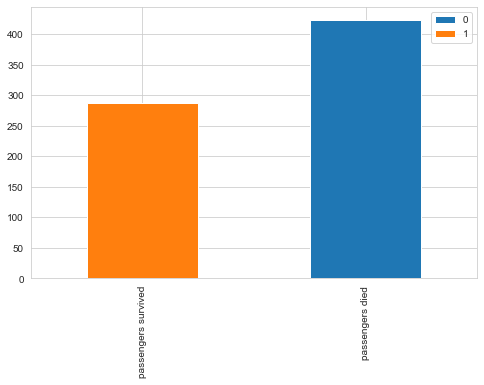

In [21]:
bar_chart_stacked(train,"Survived")

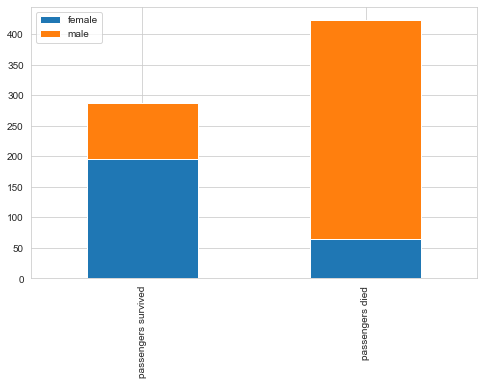

In [22]:
bar_chart_stacked(train,"Sex")#compare the survived  and dead passengers counts on gender

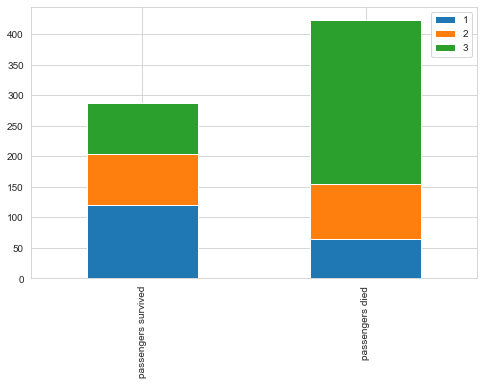

In [23]:
bar_chart_stacked(train,"Pclass")

In [24]:
def bar_chart_compare(dataset,feature1,feature2=None):
    plt.figure(figsize=(8,5))
    plt.title("survived rate by sex and pclass")
    g=sns.barplot(x=feature1,y="Survived",hue=feature2,data=dataset).set 

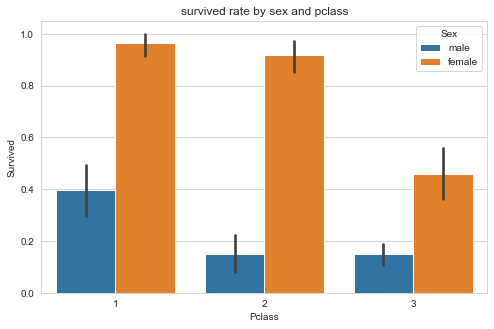

In [25]:
bar_chart_compare(train,"Pclass","Sex")

We see that the number of men and women who were survived is decreasing according to class.In addition,men and women in class 1 had a significantly higher chance of survival if they bought class 1 tickets.

In [26]:
#https://www.dataindependent.com/pandas/pandas-get-dummies/

sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)


In [27]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace= True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [29]:
train = pd.concat([train, sex, embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Data Cleaning and Data Pre - Processing

## Class


<AxesSubplot:xlabel='Survived', ylabel='count'>

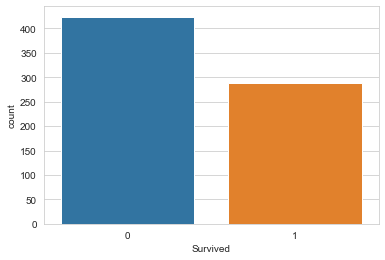

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

## Survived

In [31]:
#sns.set_style('whitegrid')
#sns.countplot(x='Survived', hue='Sex', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

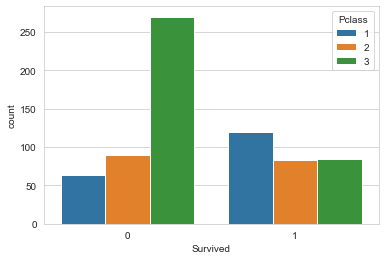

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

## Age

C:\Users\stude\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

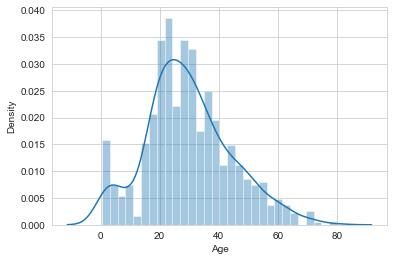

In [33]:
sns.distplot(train['Age'],kde=True, bins=30)

## Siblings

<AxesSubplot:xlabel='SibSp', ylabel='count'>

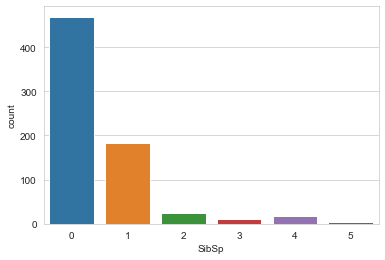

In [34]:
sns.countplot(x='SibSp',data=train)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Model building

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'],test_size=0.3, random_state=101) 

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel = LogisticRegression()

In [40]:
#Traning the Logistic regression model with  traning Data
logmodel.fit(X_train, y_train)

C:\Users\stude\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
predict = logmodel.predict(X_test)

Model Evaluation

Accuracy score

## Classification report
A Classification report is used to measure the quality of predictions from a classification algorithm



In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       128
           1       0.71      0.70      0.71        86

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



# There are four ways to check if the predictions are right or wrong:


TN / True Negative: the case was negative and predicted negative (Did not survived and pridicted that will not survive)

TP / True Positive: the case was positive and predicted positive (survived and pridicted that will survive)

FN / False Negative: the case was positive but predicted negative (survived but predicted will not

FP / False Positive: the case was negative but predicted positive Predicted to survive but did not) 


<h1>Precision — **</h1>







# What percent of your predictions were correct?

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.

# Precision:- Accuracy of positive predictions.
Precision = TP/(TP + FP)

### Recall — What percent of the positive cases did you catch?
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall:- Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)

F1 score — What percent of positive predictions were correct?
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

# Support

Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

## Confusion Matrix
A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model,of (y_test,predict)

In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict))
print("Total of 713 cases 30% of the test sett  is ,  214=105+60+26+23")

[[104  24]
 [ 26  60]]
Total of 713 cases 30% of the test sett  is ,  214=105+60+26+23


True positive: 105 (We predicted a positive result and it was positive)

True negative: 60 (We predicted a negative result and it was negative)

False positive: 23 (We predicted a positive result and it was negative)

False negative: 26 (We predicted a negative result and it was positive)

<img src="https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png?w=816">
<h4>Total of 713 cases 30% of the test sett  is ,  214=105+60+26+23</h4>

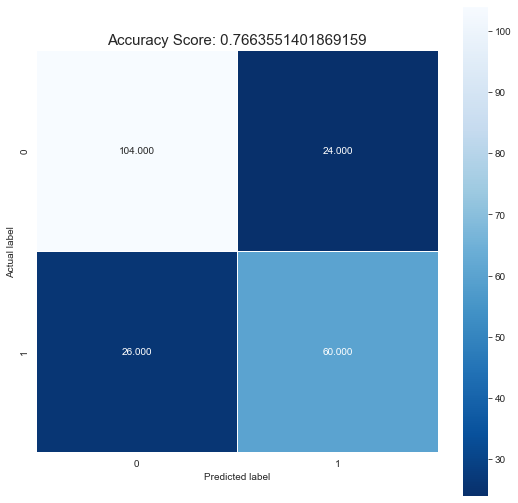

In [45]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [46]:
from sklearn import  metrics

C:\Users\stude\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


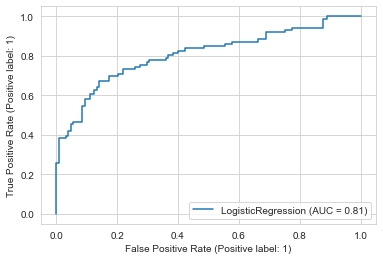

In [47]:
metrics.plot_roc_curve(logmodel, X_test, y_test)  

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

Observation..

<h1># Conclusion...</h1>

we can easily see that the Titanic survival outcome is highly depended on several predictors, such as sex, age and passenger class. In particular, female are more likely to survived than male while keeping other predictors conditions constant, older people are less likely to survived while keeping other predictors conditions constant; and lastly, people from a lower class are less likely to survived keeping other predictors conditions constant.